# Visualization of a representative of H1

In [1]:
import bats
import keras
import matplotlib.pyplot as plt
from freudenthal import freudenthal_grid
import time
import numpy as np

In [2]:
from keras.datasets import mnist

In [3]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


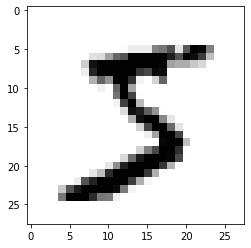

In [4]:
img = train_X[0]
img = 255 - img
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [5]:
m, n = img.shape
X = freudenthal_grid(m, n)

t0 = time.monotonic()
vals, imap = bats.lower_star_filtration(X, img.flatten())
t1 = time.monotonic()
print("time to extend: {} sec.".format(t1 - t0))

t0 = time.monotonic()
F = bats.FilteredSimplicialComplex(X, vals)
t1 = time.monotonic()
print("time to construct: {} sec.".format(t1 - t0))

t0 = time.monotonic()
R = bats.reduce(F, bats.F2())
t1 = time.monotonic()
print("time to reduce: {} sec.".format(t1 - t0))

time to extend: 0.003226756991352886 sec.
time to construct: 0.002169586019590497 sec.
time to reduce: 0.014967468974646181 sec.


time to extend: 0.0006139999895822257 sec.
time to construct: 0.0011031719914171845 sec.
time to reduce: 0.0027483779995236546 sec.
1 : (90,255) <1554,1055>


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Birth', ylabel='Death'>)

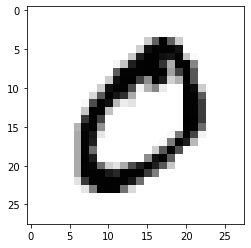

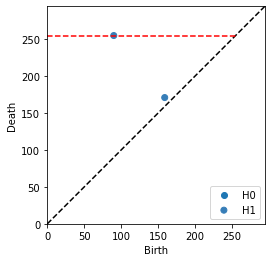

In [22]:
img = train_X[1]
img = 255 - img
plt.imshow(img, cmap=plt.get_cmap('gray'))

m, n = img.shape
X = freudenthal_grid(m, n)

t0 = time.monotonic()
vals, imap = bats.lower_star_filtration(X, img.flatten())
t1 = time.monotonic()
print("time to extend: {} sec.".format(t1 - t0))

t0 = time.monotonic()
F = bats.FilteredSimplicialComplex(X, vals)
t1 = time.monotonic()
print("time to construct: {} sec.".format(t1 - t0))

t0 = time.monotonic()
R = bats.reduce(F, bats.F2())
t1 = time.monotonic()
print("time to reduce: {} sec.".format(t1 - t0))

# ps = R.persistence_pairs(0, False) +  R.persistence_pairs(1, False)
ps = R.persistence_pairs(1, False)
nzps = []
for p in ps:
    if p.length() > 50:
        print(p)
        nzps.append(p)
        
bats.persistence_diagram(ps)

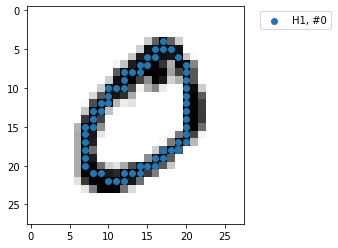

In [23]:
# visualization of a representative
plt.imshow(img, origin='upper', cmap=plt.get_cmap('gray'))

for pi, p in enumerate(nzps):
    c = R.representative(p, False)
    d = p.dim()
    skel0 = []
    for i in c.nzinds():
        skel0.extend(X.get_simplex(d, i))

    skel0 = np.unique(skel0)


    xx = skel0 % m
    yy = skel0 // m
    plt.scatter(xx[:],yy[:],label="H{}, #{}".format(d, pi))
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')